### Feature_creation

### All Features and thier description 

* `nifty_pct_change`:nifty Close price change from previous day to current day in percentage terms 
* `bank_pct_change`:Bank nifty Close price change from previous day to current day in percentage terms
* `vix_pct_change`:vix Close price change from previous day to current day in percentage terms
* `nifty_CL_PL`:diffrence between nifty current day low and previous day low 
* `bank_CL_PL`:diffrence between banknifty current day low and previous day low 
* `vix_CL_PL`:diffrence between vix current day low and previous day low
* `nifty_CH_PH`:diffrence between nifty current day high and previous day high
* `bank_CH_PH`:diffrence between bank nifty current day high and previous day high
* `vix_CH_PH`:diffrence between vix current day high and previous day high
* `vix_big_ch_up`: big positive change in vix compared to yesterday  
* `vix_big_ch_down`: big negative change in vix compared to yesterday 
* `change_in_OI`: diffrence between current day OI and previous day OI in percentage terms
* `change_in_OI_cat`: just having a categorical version of change_in_OI 
* `nifty_rsi`: technical indicator calculated on nifty Close price wich models price between 0 to 100
* `nifty_rsi_pos`: categorizing  Nifty rsi on certain threshold levels  
* `macd_crossover`: technical indicator calculted on nifty price converted to category 
* `macd_BB_band`: categorizing macd position with its std 
* `normalized_nifty_atr`: normalized atr on nifty Close price 
* `normalized__nifty_BB_width`: normalized bollinger band width on nifty Close 

for calculation of every feature go through the notebook 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("combine_data.csv",index_col = 0)
df.head()

,nifty_Close,nifty_Open,nifty_High,nifty_Low,bank_Close,bank_Open,bank_High,bank_Low,vix_Close,vix_Open,vix_High,vix_Low,Volume,OI
2011-02-14,5462.0000,5340.3999,5463.7998,5340.3999,10806.7500,10569.0000,10815.7002,10557.7002,22.58,23.47,23.69,21.56,26467050.0,29041050.0
2011-02-15,5478.5498,5469.7002,5506.5000,5408.3501,10958.4004,10827.2998,11035.1504,10722.7002,22.85,22.58,23.43,20.76,25402450.0,27333500.0
2011-02-16,5487.3999,5472.2500,5504.7998,5460.3501,10988.8496,10953.0498,11024.2500,10908.6504,23.05,22.85,23.59,21.70,17394050.0,26959500.0
2011-02-17,5548.6499,5498.7998,5553.0000,5463.3999,11134.9004,10984.0498,11190.2002,10918.0996,22.57,23.05,23.41,22.04,18547100.0,28323650.0
2011-02-18,5467.1001,5559.2500,5599.2500,5441.9502,10970.0000,11167.0996,11300.4502,10915.3496,24.18,22.57,24.52,20.38,31701150.0,27735400.0


In [3]:
### creating seprate dataset for nifty as well
nifty = df[['nifty_Close','nifty_Open','nifty_High','nifty_Low']].copy()
nifty.columns = ['Close', 'Open', 'High', 'Low']
nifty.head()

,Close,Open,High,Low
2011-02-14,5462.0000,5340.3999,5463.7998,5340.3999
2011-02-15,5478.5498,5469.7002,5506.5000,5408.3501
2011-02-16,5487.3999,5472.2500,5504.7998,5460.3501
2011-02-17,5548.6499,5498.7998,5553.0000,5463.3999
2011-02-18,5467.1001,5559.2500,5599.2500,5441.9502


In [4]:
## creating a empty feature data set
feature_df = pd.DataFrame(index = df.index)
feature_df.head()

""
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18


### Getting `pct change`  for Banknifty, Nifty and INDIAvix

In [5]:
feature_df["nifty_pct_change"] = df.nifty_Close.pct_change()
feature_df["bank_pct_change"] = df.bank_Close.pct_change()
feature_df["vix_pct_change"] = df.vix_Close.pct_change()

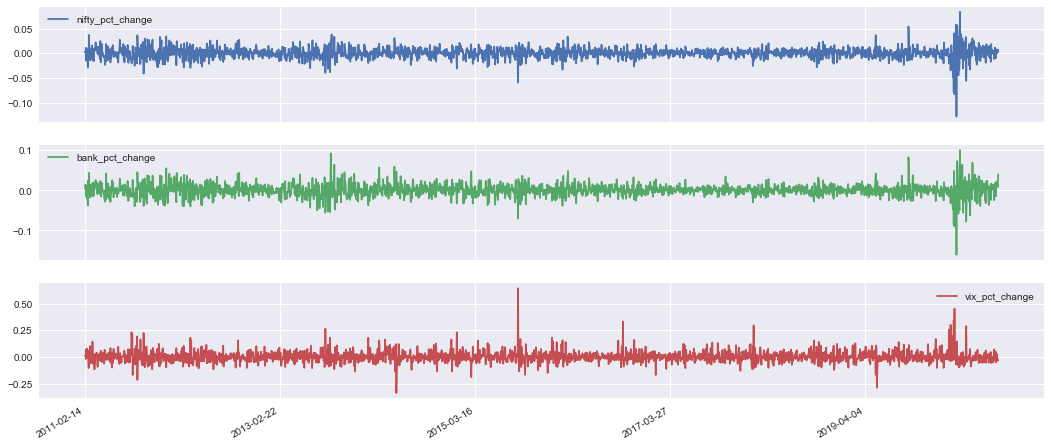

In [6]:
feature_df[['nifty_pct_change', 'bank_pct_change','vix_pct_change']].plot(figsize = (18,8),subplots = True)
plt.show()

### Compare `previos day low` with `today low `

In [7]:
feature_df["nifty_CL_PL"] = df.nifty_Low.diff()
feature_df["bank_CL_PL"] = df.bank_Low.diff()
feature_df["vix_CL_PL"] = df.vix_Low.diff()

In [8]:
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL
2011-02-14,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,67.9502,165.0000,-0.80
2011-02-16,0.001615,0.002779,0.008753,52.0000,185.9502,0.94
2011-02-17,0.011162,0.013291,-0.020824,3.0498,9.4492,0.34
2011-02-18,-0.014697,-0.014809,0.071334,-21.4497,-2.7500,-1.66


In [9]:
feature_df.columns

Index(['nifty_pct_change', 'bank_pct_change', 'vix_pct_change', 'nifty_CL_PL',
       'bank_CL_PL', 'vix_CL_PL'],
      dtype='object')

* we can see below that diffrence is acting as function of time icreasing as time passing by 
* this can cause probelem for descion tree or random forest in learning patterns 
* one way to solve this is to convert these into catogorical variables 

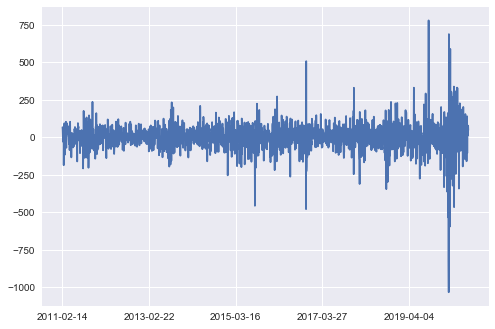

In [10]:
feature_df.nifty_CL_PL.plot()
plt.show()

In [11]:
# converting number to category 
feature_df["nifty_CL_PL"] = np.where(feature_df.nifty_CL_PL > 0,"UP","DOWN")
feature_df["bank_CL_PL"] = np.where(feature_df.bank_CL_PL > 0,"UP","DOWN")
feature_df["vix_CL_PL"] = np.where(feature_df.vix_CL_PL > 0,"UP","DOWN")

In [12]:
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN


### compare `current day High` than `previuos day High `

In [13]:
feature_df["nifty_CH_PH"] = df.nifty_High.diff()
feature_df["bank_CH_PH"] = df.bank_High.diff()
feature_df["vix_CH_PH"] = df.vix_High.diff()

In [14]:
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,NaN,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,42.7002,219.4502,-0.26
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,-1.7002,-10.9004,0.16
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,48.2002,165.9502,-0.18
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,46.2500,110.2500,1.11


In [15]:
# converting number to category 
feature_df["nifty_CH_PH"] = np.where(feature_df.nifty_CH_PH > 0,"UP","DOWN")
feature_df["bank_CH_PH"] = np.where(feature_df.bank_CH_PH > 0,"UP","DOWN")
feature_df["vix_CH_PH"] = np.where(feature_df.vix_CH_PH > 0,"UP","DOWN")

In [16]:
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP


### volitilty 
so below we are getting rolling 60 day std deviation of 1 day percentage change of vix close price and calulating upper band wich is rolling average + rolling 1std and lower band wich is rolling average  -1 rolling std  
* adding vix Close prices to the feature df
* if vix percantage change greater than 1 std 
* if vix percentage change lower than -1 std 

In [17]:
feature_df["vix_Close"] = df.vix_Close

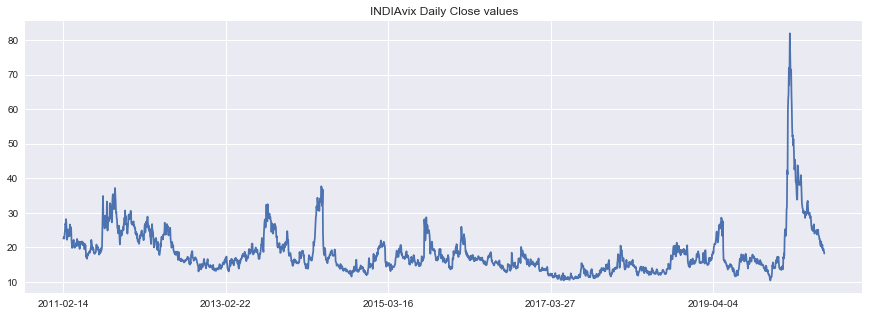

In [18]:
df.vix_Close.plot(figsize = (15,5))
plt.title("INDIAvix Daily Close values")
plt.show()

In [19]:
def bollinger_band(close_price,
                   n,
                   std):
    
    df = close_price.to_frame()
    df["sma"] = df.iloc[:,0].rolling(n).mean()
    df["rolling_std"] = df.iloc[:,0].rolling(n).std()
    df["upper_band"] = df.sma + (df.rolling_std * std) 
    df["lower_band"] = df.sma - (df.rolling_std * std) 
    df["width"] = df["upper_band"] - df["lower_band"]
    df.dropna(inplace=True)
    
    return df

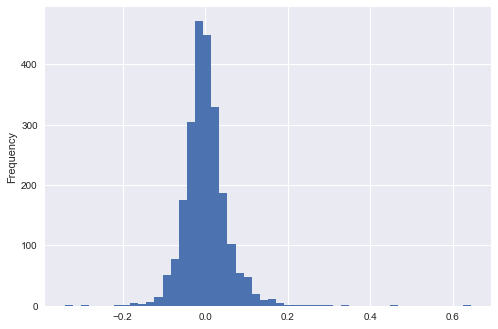

In [20]:
feature_df.vix_pct_change.plot(kind = "hist",bins = 50)
plt.show()

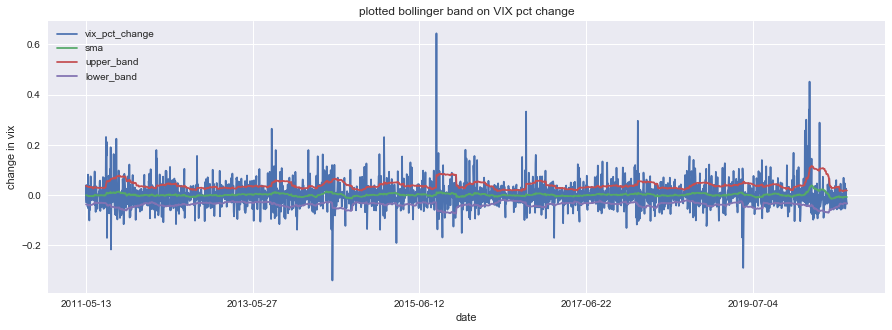

In [21]:
bb_vix = bollinger_band(feature_df.vix_pct_change,60,0.75)
bb_vix[["vix_pct_change","sma","upper_band","lower_band"]].plot(figsize = (15,5))
plt.title("plotted bollinger band on VIX pct change")
plt.ylabel("change in vix")
plt.xlabel("date")
plt.show()
plt.show()

In [22]:
#bb_vix["vix_change_cat"] = 0
bb_vix["vix_big_ch_up"] = np.where(bb_vix.vix_pct_change > bb_vix.upper_band,1,0)
bb_vix["vix_big_ch_down"] = np.where((bb_vix.vix_pct_change < bb_vix.lower_band),1,0)
bb_vix

,vix_pct_change,sma,rolling_std,upper_band,lower_band,width,vix_big_ch_up,vix_big_ch_down
2011-05-13,-0.028262,-0.000337,0.048670,0.036166,-0.036839,0.073005,0,0
2011-05-16,0.040233,0.000135,0.048927,0.036830,-0.036561,0.073390,1,0
2011-05-17,-0.020037,-0.000345,0.048982,0.036391,-0.037082,0.073473,0,0
2011-05-18,-0.015216,-0.000252,0.048948,0.036459,-0.036963,0.073422,0,0
2011-05-19,-0.014486,-0.001682,0.048066,0.034368,-0.037732,0.072100,0,0
...,...,...,...,...,...,...,...,...
2020-08-24,-0.029315,-0.007107,0.034103,0.018470,-0.032685,0.051155,0,0
2020-08-25,0.026147,-0.006779,0.034330,0.018969,-0.032526,0.051496,1,0
2020-08-26,-0.012103,-0.006668,0.034302,0.019058,-0.032395,0.051453,0,0
2020-08-27,-0.025793,-0.007213,0.034342,0.018543,-0.032970,0.051513,0,0


In [23]:
# attaching features to our feature dataset 
feature_df = pd.concat([feature_df,bb_vix[["vix_big_ch_up","vix_big_ch_down"]]],axis = 1)
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,vix_big_ch_up,vix_big_ch_down
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,22.58,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN,22.85,NaN,NaN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP,23.05,NaN,NaN
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN,22.57,NaN,NaN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP,24.18,NaN,NaN


### Open Interest
* creating two features 
* change in OI 
* categorical version of change in OI

In [24]:
feature_df["change_in_OI"] = df["OI"].pct_change()

# making categorical version of change in OI as well
feature_df["change_in_OI_cat"] = 0
feature_df.loc[feature_df.change_in_OI > 0,"change_in_OI_cat"] = "UP"
feature_df.loc[feature_df.change_in_OI < 0,"change_in_OI_cat"] = "DOWN"

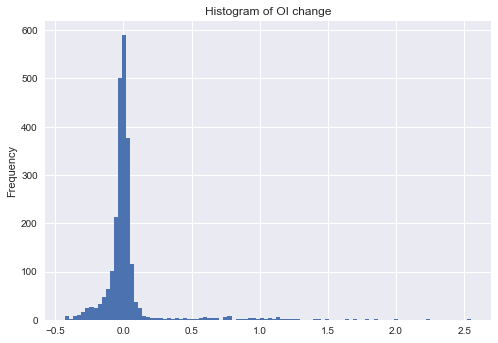

In [25]:
feature_df.change_in_OI.plot(kind = "hist",bins = 100)
plt.title("Histogram of OI change")
plt.show()

### RSI 

In [26]:
def rsi(close_price,
       n):
    
    df = close_price.to_frame()
    df.columns = ["Close"]
    # calulate diffrence in price in rs from prevous day to current day 
    df["diff"] = df.Close.diff()

    # seprate the diffrence value in gain and loss columns and they should be in absolute terms  
    df["gain"] = np.where(df["diff"] > 0,abs(df["diff"]),0)
    df["loss"] = np.where(df["diff"] < 0,abs(df["diff"]),0)
    df.dropna(inplace=True)

    # calculate average gain and average loss
    df["avg_gain"] = df.gain.rolling(n).mean()
    df["avg_loss"] = df.loss.rolling(n).mean()

    # now calculate RS relative strenght RS = Average gain/Average Loss
    df["RS"] = df.avg_gain/df.avg_loss

    # formula for RSI 
    # RSI = 100 - (100/(1+RS))
    df.dropna(inplace=True)
    df["RSI"] = 100 - (100/(1 + df.RS))
    
    return df.RSI

In [27]:
r = pd.DataFrame(data = rsi(df.nifty_Close,14),columns=["RSI"])
r.head()

,RSI
2011-03-07,50.262874
2011-03-08,52.586369
2011-03-09,51.833424
2011-03-10,46.639821
2011-03-11,48.862811


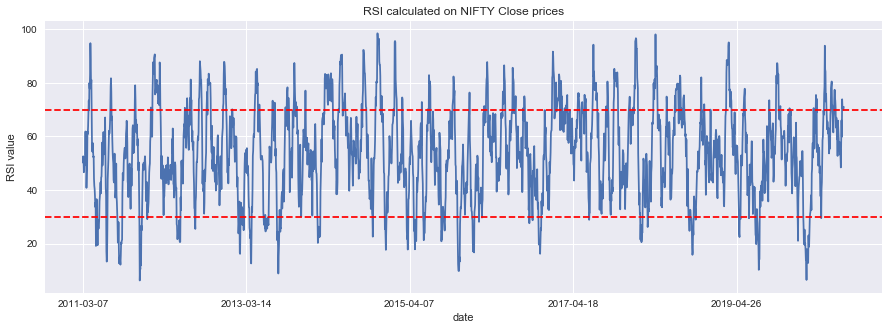

In [28]:
r.RSI.plot(figsize = (15,5))

upper_thresh = 70
lower_thresh = 30

plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')

plt.title("RSI calculated on NIFTY Close prices")
plt.ylabel("RSI value")
plt.xlabel("date")
plt.show()

In [29]:
r["nifty_rsi_pos"] = 0
r.loc[r.RSI > 70,"nifty_rsi_pos"] = "ABOVE"
r.loc[r.RSI < 30,"nifty_rsi_pos"] = "BELOW"
r.loc[(r.RSI < 70) & (r.RSI > 30),"nifty_rsi_pos"] = "INSIDE"
r.head()

,RSI,nifty_rsi_pos
2011-03-07,50.262874,INSIDE
2011-03-08,52.586369,INSIDE
2011-03-09,51.833424,INSIDE
2011-03-10,46.639821,INSIDE
2011-03-11,48.862811,INSIDE


In [30]:
feature_df["nifty_rsi"] = r.RSI
feature_df["nifty_rsi_pos"] = r.nifty_rsi_pos
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,vix_big_ch_up,vix_big_ch_down,change_in_OI,change_in_OI_cat,nifty_rsi,nifty_rsi_pos
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,22.58,NaN,NaN,NaN,0,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN,22.85,NaN,NaN,-0.058798,DOWN,NaN,NaN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP,23.05,NaN,NaN,-0.013683,DOWN,NaN,NaN
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN,22.57,NaN,NaN,0.050600,UP,NaN,NaN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP,24.18,NaN,NaN,-0.020769,DOWN,NaN,NaN


### MACD
* If signal line in MACD is greter than MACDline then we categirze as up and vica versa

In [31]:
def macd(close_price,
         fast,
         slow,
         signal):
    
    df = close_price.to_frame()
    df["ema_fast"] = df.iloc[:,0].ewm(span=fast,min_periods=fast).mean()
    df["ema_slow"] = df.iloc[:,0].ewm(span=slow,min_periods=slow).mean()
    df["macd"] = df.ema_fast - df.ema_slow
    df["signal"] = df["macd"].ewm(span=signal,min_periods=signal).mean()
    df.dropna(inplace = True) 
    
    return df

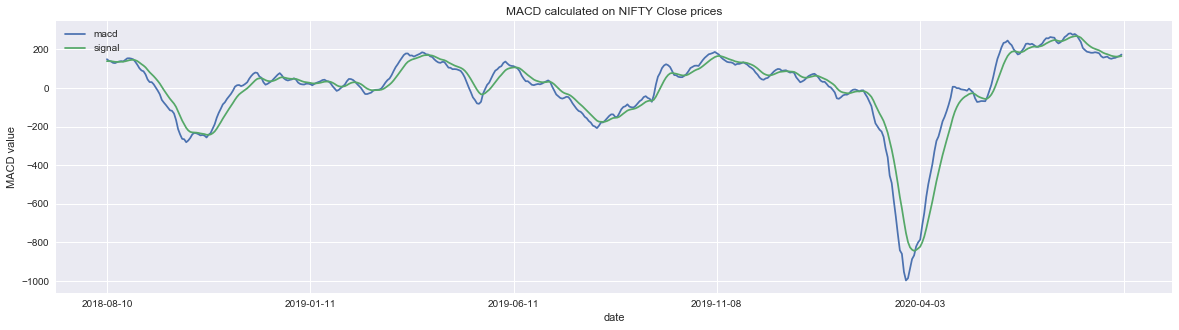

In [32]:
m = macd(df.nifty_Close,
    fast = 12,
    slow = 26,
    signal = 9)

m.iloc[-500:,3:].plot(figsize = (20,5))

plt.title("MACD calculated on NIFTY Close prices")
plt.ylabel("MACD value")
plt.xlabel("date")
plt.show()

In [33]:
m["macd_crossover"] = 0
m.loc[m.macd > m.signal,"macd_crossover"] = "UP"
m.loc[m.macd < m.signal,"macd_crossover"] = "DOWN"

# adding column to feature df
feature_df["macd_crossover"] = m.macd_crossover
m.head()

,nifty_Close,ema_fast,ema_slow,macd,signal,macd_crossover
2011-04-01,5828.0498,5659.697082,5582.831646,76.865436,45.250022,UP
2011-04-04,5908.1499,5698.031335,5608.677357,89.353977,55.131868,UP
2011-04-05,5902.2002,5729.518898,5631.872368,97.646530,64.433833,UP
2011-04-06,5889.6499,5754.205498,5652.142371,102.063127,72.515028,UP
2011-04-07,5883.5000,5774.131833,5670.252304,103.879530,79.152846,UP


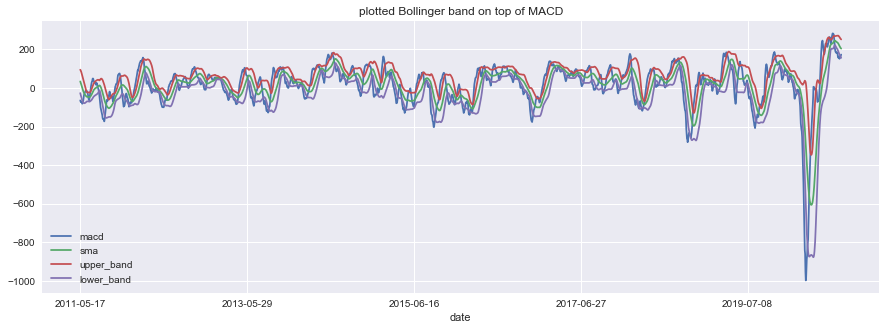

In [34]:
macd_bb = bollinger_band(m.macd,30,1)
macd_bb[["macd","sma","upper_band","lower_band"]].plot(figsize = (15,5))

plt.title("plotted Bollinger band on top of MACD")
plt.xlabel("date")
plt.show()

plt.show()

In [35]:
# making a column to keep track of MACD position to its bollinger band 
macd_bb["macd_bb_position"] = 0

macd_bb.loc[macd_bb.macd > macd_bb.upper_band,"macd_bb_position"] = "UP"
macd_bb.loc[macd_bb.macd < macd_bb.lower_band,"macd_bb_position"] = "below"
macd_bb.loc[(macd_bb.macd < macd_bb.upper_band) & (macd_bb.macd > macd_bb.lower_band),"macd_bb_position"] = "INSIDE"

# adding column to feature df
feature_df["macd_BB_band"] = macd_bb.macd_bb_position

In [36]:
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,vix_big_ch_up,vix_big_ch_down,change_in_OI,change_in_OI_cat,nifty_rsi,nifty_rsi_pos,macd_crossover,macd_BB_band
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,22.58,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN,22.85,NaN,NaN,-0.058798,DOWN,NaN,NaN,NaN,NaN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP,23.05,NaN,NaN,-0.013683,DOWN,NaN,NaN,NaN,NaN
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN,22.57,NaN,NaN,0.050600,UP,NaN,NaN,NaN,NaN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP,24.18,NaN,NaN,-0.020769,DOWN,NaN,NaN,NaN,NaN


### ATR 

In [37]:
def atr(df,
        n):
    
    df["previous_close"] = df.Close.shift(1)
    df.dropna(inplace = True)

    df['CH-CL']=abs(df['High'] - df['Low'])
    df['CH-PC']=abs(df['High'] - df["previous_close"])
    df['CL-PC']=abs(df['Low']  - df["previous_close"])

    df['True_Range'] = df.loc[:,['CH-CL', 'CH-PC', 'CL-PC']].max(axis = 1)
    df['ATR'] = df['True_Range'].rolling(n).mean()
    df = df[["Close","ATR"]].dropna().copy()
    
    return df

if u look closely ATR is also acting as a function of time slowly increasing as nifty absulote price is incresing so i will normalize it as well

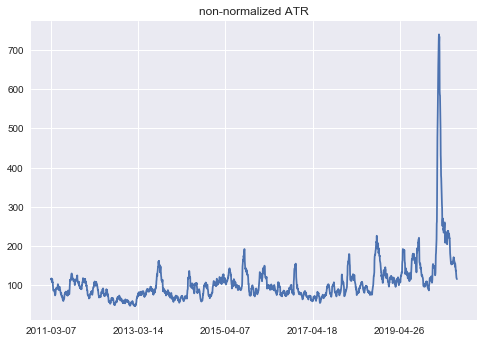

In [38]:
a = atr(nifty,14)
a.ATR.plot()
plt.title("non-normalized ATR")
plt.show()

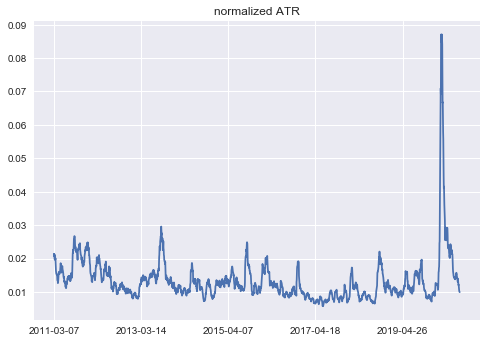

In [39]:
(a.ATR/a.Close).plot()
plt.title("normalized ATR")
plt.show()

In [40]:
feature_df["normalized_nifty_atr"] = (a.ATR/a.Close)
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,vix_big_ch_up,vix_big_ch_down,change_in_OI,change_in_OI_cat,nifty_rsi,nifty_rsi_pos,macd_crossover,macd_BB_band,normalized_nifty_atr
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,22.58,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN,22.85,NaN,NaN,-0.058798,DOWN,NaN,NaN,NaN,NaN,NaN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP,23.05,NaN,NaN,-0.013683,DOWN,NaN,NaN,NaN,NaN,NaN
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN,22.57,NaN,NaN,0.050600,UP,NaN,NaN,NaN,NaN,NaN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP,24.18,NaN,NaN,-0.020769,DOWN,NaN,NaN,NaN,NaN,NaN


### bollinger band width 

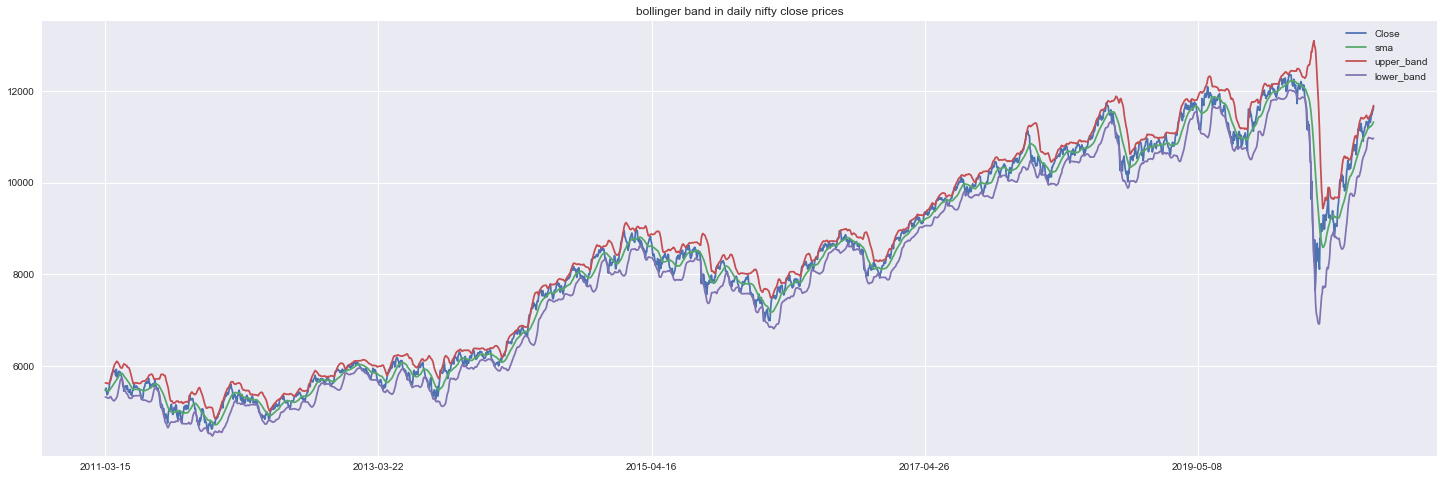

In [41]:
s = bollinger_band(nifty.Close,
              n = 20,
              std = 2)

s.loc[:,['Close', 'sma','upper_band','lower_band']].plot(figsize = (25,8))
plt.title("bollinger band in daily nifty close prices")
plt.show()

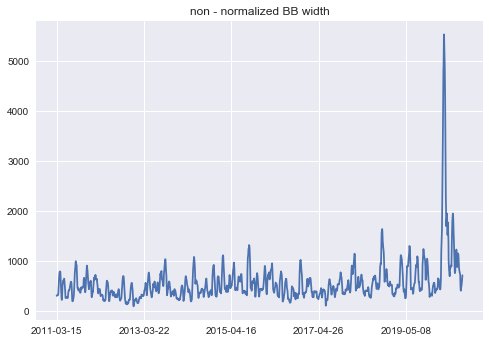

In [42]:
s.width.plot()
plt.title("non - normalized BB width")
plt.show()

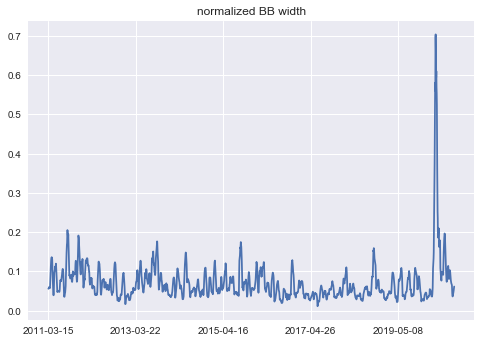

In [43]:
(s.width/s.Close).plot()
plt.title("normalized BB width")
plt.show()

In [44]:
feature_df["normalized__nifty_BB_width"] = (s.width/s.Close)
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,vix_big_ch_up,vix_big_ch_down,change_in_OI,change_in_OI_cat,nifty_rsi,nifty_rsi_pos,macd_crossover,macd_BB_band,normalized_nifty_atr,normalized__nifty_BB_width
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,22.58,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN,22.85,NaN,NaN,-0.058798,DOWN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP,23.05,NaN,NaN,-0.013683,DOWN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN,22.57,NaN,NaN,0.050600,UP,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP,24.18,NaN,NaN,-0.020769,DOWN,NaN,NaN,NaN,NaN,NaN,NaN


### Target Variable
* so our aim is predict nifty UP or DOWN movement for next day so we are shifting next day movement one day prior and categorizing it 

In [45]:
feature_df["target"] = np.where(feature_df.nifty_pct_change > 0,"UP","DOWN")
feature_df["target"] = feature_df.target.shift(-1)
feature_df.head()

,nifty_pct_change,bank_pct_change,vix_pct_change,nifty_CL_PL,bank_CL_PL,vix_CL_PL,nifty_CH_PH,bank_CH_PH,vix_CH_PH,vix_Close,...,vix_big_ch_down,change_in_OI,change_in_OI_cat,nifty_rsi,nifty_rsi_pos,macd_crossover,macd_BB_band,normalized_nifty_atr,normalized__nifty_BB_width,target
2011-02-14,NaN,NaN,NaN,DOWN,DOWN,DOWN,DOWN,DOWN,DOWN,22.58,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UP
2011-02-15,0.003030,0.014033,0.011957,UP,UP,DOWN,UP,UP,DOWN,22.85,...,NaN,-0.058798,DOWN,NaN,NaN,NaN,NaN,NaN,NaN,UP
2011-02-16,0.001615,0.002779,0.008753,UP,UP,UP,DOWN,DOWN,UP,23.05,...,NaN,-0.013683,DOWN,NaN,NaN,NaN,NaN,NaN,NaN,UP
2011-02-17,0.011162,0.013291,-0.020824,UP,UP,UP,UP,UP,DOWN,22.57,...,NaN,0.050600,UP,NaN,NaN,NaN,NaN,NaN,NaN,DOWN
2011-02-18,-0.014697,-0.014809,0.071334,DOWN,DOWN,DOWN,UP,UP,UP,24.18,...,NaN,-0.020769,DOWN,NaN,NaN,NaN,NaN,NaN,NaN,UP


### saving Feature df

In [46]:
feature_df.dropna(inplace=True)
feature_df.to_csv("features.csv")